# Лабораторная работа №4

ФИО: Хайдукова Мария Игоревна  
Группа: БИВТ-23-СП-3

## 1. Пример импорта данных. Грузим данные

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [46]:
data = pd.read_csv('../Downloads/students_adaptability_level_online_education.csv')

## 2. Понимаем, какая перед нами задача

#### Задача многоклассовой классификации с 3 классами у целевой переменной 'Adaptivity Level'

In [6]:
data['Adaptivity Level'].nunique()

3

## 3. Делаем предобработку данных

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [44]:
for column in data.columns:
    print(f"{column}: {data[column].unique()}")

Gender: [1 0]
Age: ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Education Level: [2 1 0]
Institution Type: [0 1]
IT Student: ['No' 'Yes']
Location: ['Yes' 'No']
Load-shedding: ['Low' 'High']
Financial Condition: ['Mid' 'Poor' 'Rich']
Internet Type: ['Wifi' 'Mobile Data']
Network Type: ['4G' '3G' '2G']
Class Duration: ['3-6' '1-3' '0']
Self Lms: ['No' 'Yes']
Device: ['Tab' 'Mobile' 'Computer']
Adaptivity Level: ['Moderate' 'Low' 'High']


In [50]:
data.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [51]:
data_encoded = data.copy()

In [52]:
exclude_columns = ['Age', 'Class Duration']

label_encoders = {}

for column in data_encoded.columns:
    if column not in exclude_columns:
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_encoded[column])
        label_encoders[column] = le

In [55]:
for column in data_encoded.columns:
    print(f"{column}: {data_encoded[column].unique()}")

Gender: [0 1]
Age: ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Education Level: [2 0 1]
Institution Type: [1 0]
IT Student: [0 1]
Location: [1 0]
Load-shedding: [1 0]
Financial Condition: [0 1 2]
Internet Type: [1 0]
Network Type: [2 1 0]
Class Duration: ['3-6' '1-3' '0']
Self Lms: [0 1]
Device: [2 1 0]
Adaptivity Level: [2 1 0]


In [57]:
label_encoders

{'Gender': LabelEncoder(),
 'Education Level': LabelEncoder(),
 'Institution Type': LabelEncoder(),
 'IT Student': LabelEncoder(),
 'Location': LabelEncoder(),
 'Load-shedding': LabelEncoder(),
 'Financial Condition': LabelEncoder(),
 'Internet Type': LabelEncoder(),
 'Network Type': LabelEncoder(),
 'Self Lms': LabelEncoder(),
 'Device': LabelEncoder(),
 'Adaptivity Level': LabelEncoder()}

In [61]:
for col, enc in label_encoders.items():
    print(f"{col}:", dict(zip(enc.classes_, enc.transform(enc.classes_))))

Gender: {'Boy': np.int64(0), 'Girl': np.int64(1)}
Education Level: {'College': np.int64(0), 'School': np.int64(1), 'University': np.int64(2)}
Institution Type: {'Government': np.int64(0), 'Non Government': np.int64(1)}
IT Student: {'No': np.int64(0), 'Yes': np.int64(1)}
Location: {'No': np.int64(0), 'Yes': np.int64(1)}
Load-shedding: {'High': np.int64(0), 'Low': np.int64(1)}
Financial Condition: {'Mid': np.int64(0), 'Poor': np.int64(1), 'Rich': np.int64(2)}
Internet Type: {'Mobile Data': np.int64(0), 'Wifi': np.int64(1)}
Network Type: {'2G': np.int64(0), '3G': np.int64(1), '4G': np.int64(2)}
Self Lms: {'No': np.int64(0), 'Yes': np.int64(1)}
Device: {'Computer': np.int64(0), 'Mobile': np.int64(1), 'Tab': np.int64(2)}
Adaptivity Level: {'High': np.int64(0), 'Low': np.int64(1), 'Moderate': np.int64(2)}


In [63]:
data_encoded['Age'].unique()

array(['21-25', '16-20', '11-15', '26-30', '6-10', '1-5'], dtype=object)

In [65]:
data_encoded['Age'] = data_encoded['Age'].map({'21-25' : 23,
                                             '16-20' : 18,
                                             '11-15' : 13,
                                             '26-30' : 28,
                                             '6-10' : 8,
                                             '1-5' : 3})

In [67]:
data_encoded['Class Duration'].unique()

array(['3-6', '1-3', '0'], dtype=object)

In [68]:
data_encoded['Class Duration'] = data_encoded['Class Duration'].map({'3-6' : 4, '1-3' : 2, '0' : 0})

In [71]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               1205 non-null   int64
 1   Age                  1205 non-null   int64
 2   Education Level      1205 non-null   int64
 3   Institution Type     1205 non-null   int64
 4   IT Student           1205 non-null   int64
 5   Location             1205 non-null   int64
 6   Load-shedding        1205 non-null   int64
 7   Financial Condition  1205 non-null   int64
 8   Internet Type        1205 non-null   int64
 9   Network Type         1205 non-null   int64
 10  Class Duration       1205 non-null   int64
 11  Self Lms             1205 non-null   int64
 12  Device               1205 non-null   int64
 13  Adaptivity Level     1205 non-null   int64
dtypes: int64(14)
memory usage: 131.9 KB


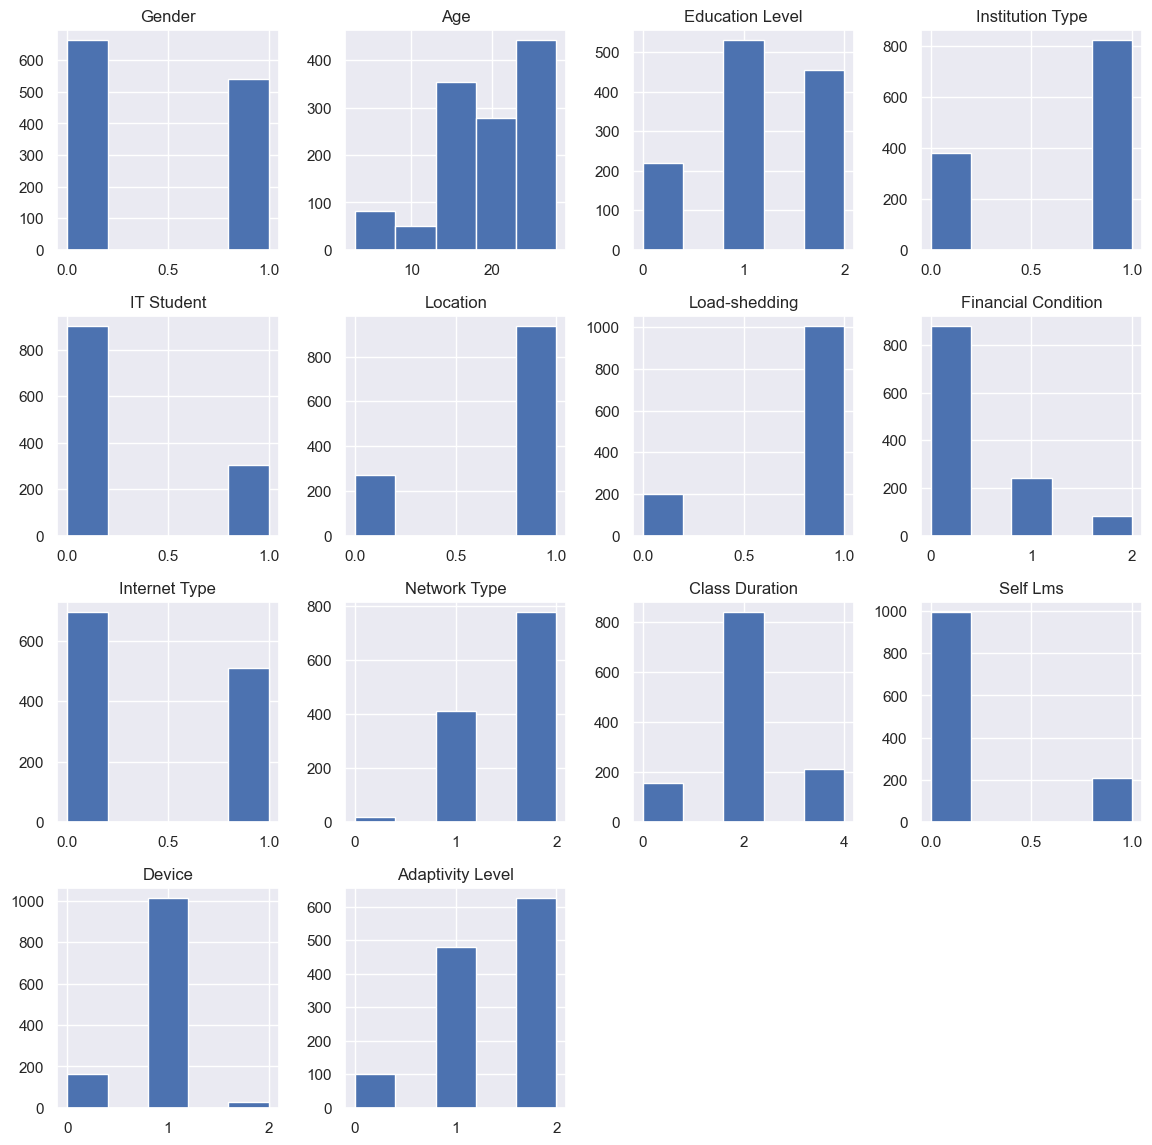

In [85]:
sns.set()

data_encoded.hist(bins=5, figsize=(14,14));

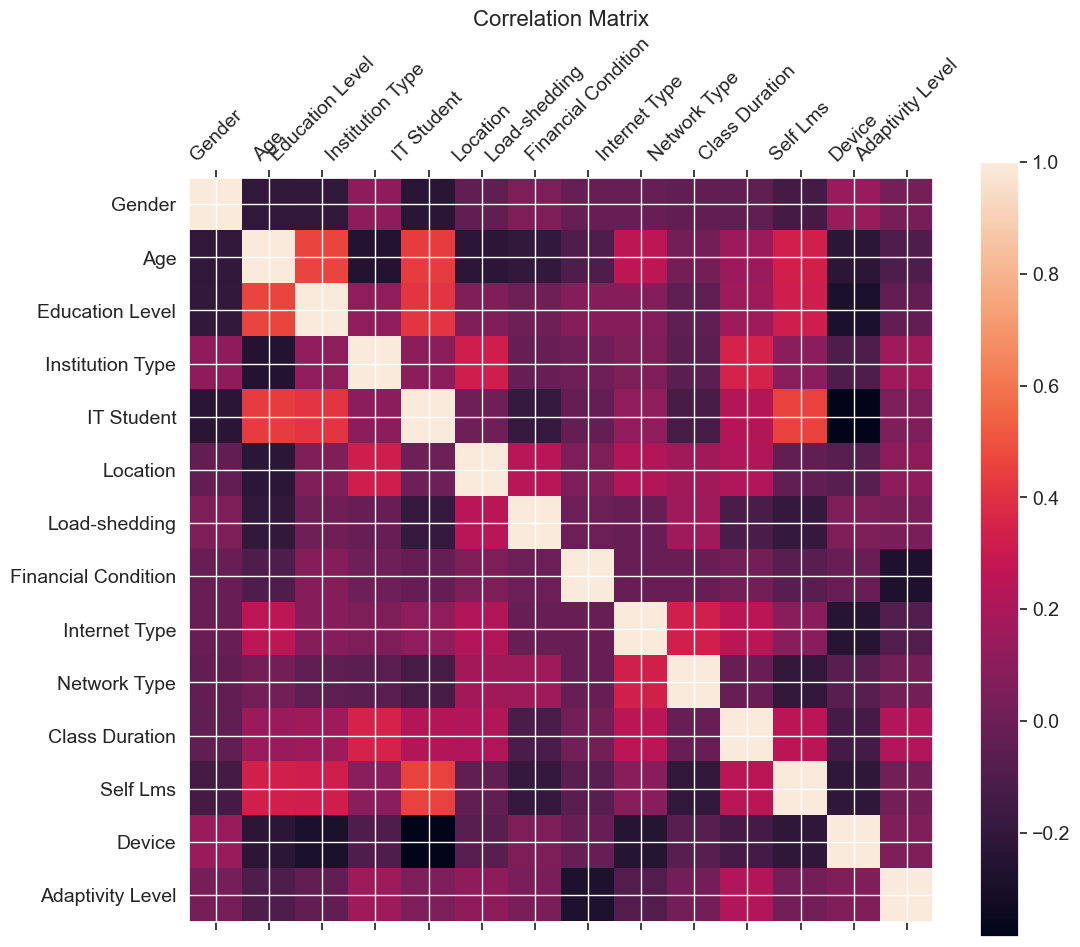

In [91]:
f = plt.figure(figsize=(12, 10))
plt.matshow(data_encoded.corr(), fignum=f.number)
plt.xticks(range(data_encoded.select_dtypes(['number']).shape[1]), data_encoded.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data_encoded.select_dtypes(['number']).shape[1]), data_encoded.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [92]:
X = data_encoded.drop(columns='Adaptivity Level')
y = data_encoded['Adaptivity Level']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [98]:
scaler = StandardScaler()
X_train['avg_Age_scaled'] = scaler.fit_transform(X_train[['Age']])

X_test['avg_Age_scaled'] = scaler.transform(X_test[['Age']])

X_train = X_train.drop('Age', axis=1)
X_test = X_test.drop('Age', axis=1)

## 4. Оформление данных

Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).

In [116]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class SimpleDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.long)
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [117]:
train_dataset = SimpleDataset(X_train, y_train)
test_dataset = SimpleDataset(X_test, y_test)

print(f"Тренировочный Dataset: {len(train_dataset)} элементов")
print(f"Тестовый Dataset: {len(test_dataset)} элементов")

one_feature, one_label = train_dataset[0]
print(f"\nПервый элемент из train_dataset:")
print(f"  Признаки (форма): {one_feature.shape}")
print(f"  Признаки (первые 3): {one_feature[:3]}")
print(f"  Метка: {one_label}")

Тренировочный Dataset: 903 элементов
Тестовый Dataset: 302 элементов

Первый элемент из train_dataset:
  Признаки (форма): torch.Size([13])
  Признаки (первые 3): tensor([1., 2., 1.])
  Метка: 1


In [119]:
BATCH_SIZE = 20

train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

print(f"DataLoader создан с batch_size = {BATCH_SIZE}")
print(f"  Train DataLoader: {len(train_dataloader)} батчей")
print(f"  Test DataLoader: {len(test_dataloader)} батчей")

DataLoader создан с batch_size = 20
  Train DataLoader: 46 батчей
  Test DataLoader: 16 батчей


In [120]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

print(f"✓ Один батч из train_dataloader:")
print(f"  Форма признаков: {train_features_batch.shape}")
print(f"    - Это значит: [размер_батча, количество_признаков]")
print(f"    - У нас: [{BATCH_SIZE}, {train_features_batch.shape[1]}]")
print(f"  Форма меток: {train_labels_batch.shape}")
print(f"    - Это значит: [размер_батча]")
print(f"    - У нас: [{BATCH_SIZE}]")

print(f"\nПервые 5 меток в батче: {train_labels_batch[:5]}")
print("(Это числа - номера классов)")

✓ Один батч из train_dataloader:
  Форма признаков: torch.Size([20, 13])
    - Это значит: [размер_батча, количество_признаков]
    - У нас: [20, 13]
  Форма меток: torch.Size([20])
    - Это значит: [размер_батча]
    - У нас: [20]

Первые 5 меток в батче: tensor([1, 2, 2, 1, 2])
(Это числа - номера классов)


## 5. Обучение нейросети

Обучить на тренировочном множестве:  
- Очень простую однослойную нейросеть с оптимизатором SGD (link).  
- Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором Adam (link).  
- Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором Adam (link).

In [121]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [124]:
train_losses1 = []
test_losses1 = []

for epoch in range(50):
    model1.train()
    train_loss = 0
    for features, labels in train_dataloader:
        optimizer1.zero_grad()
        outputs = model1(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer1.step()
        train_loss += loss.item()
    
    model1.eval()
    test_loss = 0
    with torch.no_grad():
        for features, labels in test_dataloader:
            outputs = model1(features)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    
    train_losses1.append(train_loss / len(train_dataloader))
    test_losses1.append(test_loss / len(test_dataloader))

print("Обучение модели 1 завершено")

Обучение модели 1 завершено


In [125]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(13, 32)
        self.fc2 = nn.Linear(32, 3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model2 = Model2()
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

train_losses2 = []
test_losses2 = []

for epoch in range(50):
    model2.train()
    train_loss = 0
    for features, labels in train_dataloader:
        optimizer2.zero_grad()
        outputs = model2(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer2.step()
        train_loss += loss.item()
    
    model2.eval()
    test_loss = 0
    with torch.no_grad():
        for features, labels in test_dataloader:
            outputs = model2(features)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    
    train_losses2.append(train_loss / len(train_dataloader))
    test_losses2.append(test_loss / len(test_dataloader))

print("Обучение модели 2 завершено")

Обучение модели 2 завершено


In [126]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

model3 = Model3()
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)

train_losses3 = []
test_losses3 = []

for epoch in range(50):
    model3.train()
    train_loss = 0
    for features, labels in train_dataloader:
        optimizer3.zero_grad()
        outputs = model3(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer3.step()
        train_loss += loss.item()
    
    model3.eval()
    test_loss = 0
    with torch.no_grad():
        for features, labels in test_dataloader:
            outputs = model3(features)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    
    train_losses3.append(train_loss / len(train_dataloader))
    test_losses3.append(test_loss / len(test_dataloader))

print("Обучение модели 3 завершено")

Обучение модели 3 завершено


## 6. Посчитайте loss на train и test множествах

Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки matplotlib (выйдет так называемая learning curve, кривая обучения модели).

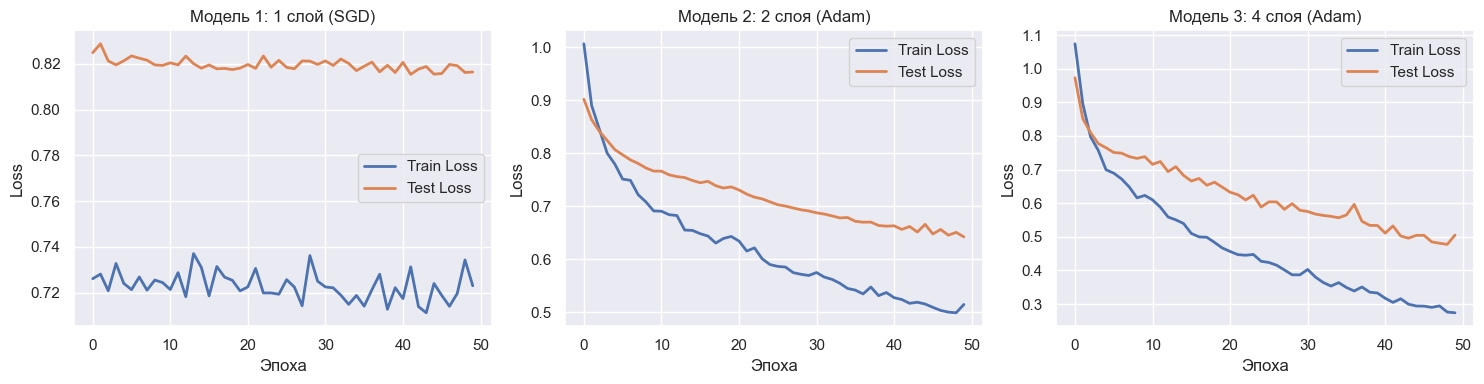

In [129]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(train_losses1, label='Train Loss', linewidth=2)
plt.plot(test_losses1, label='Test Loss', linewidth=2)
plt.title('Модель 1: 1 слой (SGD)')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(train_losses2, label='Train Loss', linewidth=2)
plt.plot(test_losses2, label='Test Loss', linewidth=2)
plt.title('Модель 2: 2 слоя (Adam)')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(train_losses3, label='Train Loss', linewidth=2)
plt.plot(test_losses3, label='Test Loss', linewidth=2)
plt.title('Модель 3: 4 слоя (Adam)')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 7. Посчитаем метрики

Посчитайте метрики на train и test множествах:  
Для задачи классификации -- Accuracy  
Для задачи регрессии -- MAE

In [136]:
def acc(model, loader):
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for x, y in loader:
            _, pred = torch.max(model(x), 1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    return correct/total

print(f"Модель 1: Train={acc(model1, train_dataloader):.3f}, Test={acc(model1, test_dataloader):.3f}")
print(f"Модель 2: Train={acc(model2, train_dataloader):.3f}, Test={acc(model2, test_dataloader):.3f}")
print(f"Модель 3: Train={acc(model3, train_dataloader):.3f}, Test={acc(model3, test_dataloader):.3f}")

Модель 1: Train=0.699, Test=0.659
Модель 2: Train=0.810, Test=0.728
Модель 3: Train=0.886, Test=0.798


## 8. Сравнение метрик

1) Какая модель справилась лучше с поставленной задачей?  
2) Имеет ли место переобучение?  
3) Имеет ли место недообучение?  
4) Как можно улучшить метрики моделей?  

#### 1
**Модель 3 (4 слоя, Adam)**, так как она имеет самую высокую Test Accuracy = 79.8%

#### 2
Да, есть переобучение, особенно у сложных моделей.  
Большая разница между Train и Test Accuracy: 1 - 4.0%, 2 - 8.2%, 3 - 8.8%

#### 3
У Модели 1 - возможно, у Моделей 2 и 3 - нет  
Недообучение - низкая accuracy и на Train, и на Test

#### 4
1. Увеличить количество данных
2. Использовать кросс-валидацию для лучшей оценки